### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [1]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [2]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\June_2021\climate_df_June21.pkl")

In [5]:
df.head(100)

,tweet_id,hashtags,tweet_text,is_reply,is_retweet,user_name,created
178,1399878175371325445,[],"@weizhangatmos @climatedepot so how do you explain widespread record cold weather in britain, across europe, australia, russia, north america and on and on? you are a fraud... and your claim is ludicrous. people are waking up to this dishonesty.",WeiZhangAtmos,False,PeterDClack,Tue Jun 01 23:59:00 +0000 2021
1253,1399876641690558466,[],"@jjhorgan forestry announcement supported by disinformation is a renewed call to action for residents who care about the loss of animals, #oldgrowth, #climatecrisis, drinking #water, #wildfire, and the province their children will inherit. #biodiversity #forests #bcpoli #cdnpoli",jjhorgan,False,AnthonyBritneff,Tue Jun 01 23:52:54 +0000 2021
1637,1399876093008433153,[],"@smarzeli @particle96 @kctaz @brknman @ingersolrobert @goodcollie @27legin @sueytonius @tangomitteckel @chimera414 @jsharkjill @tokyo_tom @thedisproof @rulebylogic @stephen90045069 @swcrisis @kenneth72712993 @joetheatheistp @oscarswild1 @ancistroneura @climatepatriot @ianrowley677 @jefftonna1 @megquahogri @frankwi74044551 @ncdave4life @trevordkidd1 @dawntj90 @boggywood @cyclejunkie88 @nvangelder03 @victorinmarie @sharksandwhich @ceist8 @marylal82360537 @nogo_1965 @bailfund_brawl @alshalloway @insane_voice @bradpkeyes @fauntleroy1934 @joedieseldodge @badgersno @fknsavages27 @simonpearson961 @joetheatheist @cmorrisonesq @maya_phd @cymaticwave @schtickery nobody wants unreliable, eco disaster, expensive green energy. if it was so great and so cheap you’d all be lining your roofs with solar panels by now. but most of you aren’t even doing that.",smarzeli,False,Jamz129,Tue Jun 01 23:50:43 +0000 2021
2113,1399875337136259076,[],"@resistancecent @usa_polling why has biden abandoned a public option, major action on climate change, $15 minimum wage, etc? its not because manchin and sinema are useful idiots (although yall defended them when progressives tried to primary them) its because neither he nor kamala wants those policies either",kaiserkhan100,False,kaiserkhan100,Tue Jun 01 23:47:43 +0000 2021
3654,1399873160451919877,[],"colonial pipeline hacked - may 7\nbeef producer hacked - may 30\n\nthe hackers are probably climate change fanatics allied with the cia/fbi. of course, the deep state blames “russia”.\n\nit’s like the left is implementing the #greennewdeal using the underworld.\nhttps://t.co/6fifj0op8v",None,False,RamjattanChris,Tue Jun 01 23:39:04 +0000 2021
3711,1399873090482577410,[],@lex18news i love how every single person screaming 'fake news' about this article is a boomer who will more than likely be dead by the time the real horrors of climate change roll around. u cant explain to me the themo-insulating properties of ghg's but by god ur quick to run ur mouth...,LEX18News,False,Rusty78910,Tue Jun 01 23:38:47 +0000 2021
3913,1399872792288444417,[],"@millymolly300 @climatedepot truth again reveals another globalist propaganda lie.\n\nnasa vegetation index: globe continues rapid greening trend, sahara alone shrinks 700,000 sq km!\n\n“10% global greening in 20 years! we are incredibly fortunate!”\n\nhttps://t.co/wejpvjx6v0",MillyMolly300,False,EdPalmer001,Tue Jun 01 23:37:36 +0000 2021
3940,1399872740299968513,[],"@scottadamssays odd how they stopped hating putin all the sudden. even worthy of a pipeline...that they were horrified trump would do, even with global warming issues..and russian hackings (might want to check with deep state) and stuff. did covid miraculously cure russian hate?",ScottAdamsSays,False,KimPete95352673,Tue Jun 01 23:37:24 +0000 2021
4205,1399872349403553797,[],"rt @climateaudit: 4/ strzok and page were right that their fbi [intel analyst] was ""one of the worst offenders of the conspiracy theories"",…",None,False,VanCityToday,Tue Jun 01 23:35:51 +0000 2021
5066,1399871024116682755,[],@climateaudit could it be senator harry reid? reid was the one unsuccessfully pressuring comey to announce that the fbi was in

# Number of tweets

In [6]:
print(f"{len(df)} texts loaded.")

351511 texts loaded.


In [7]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'ClimateChange': 5146,
         'climatechange': 2115,
         'climate': 1883,
         'ClimateCrisis': 1321,
         'ClimateBrawl': 1281,
         'G7Summit': 1002,
         'misinformation': 849,
         'ClimateAction': 774,
         'PitMad': 568,
         'Climate': 548,
         'ClimateEmergency': 501,
         'disinformation': 498,
         'conspiracy': 478,
         'paranormal': 440,
         'COVID19': 414,
         'propaganda': 336,
         'HAARP': 331,
         'Disinformation': 306,
         'auspol': 306,
         'NewClimateWar': 295,
         'science': 282,
         'Propaganda': 281,
         'greenwashing': 275,
         'America': 269,
         'ActOnClimate': 262,
         'JoeBiden': 255,
         'NetZero': 249,
         'bioenergy': 241,
         'solution': 241,
         'treason': 238,
         'betrayal': 238,
         'climatecrisis': 236,
         'covid19': 235,
         'GlobalWarming': 227,
         'RussiaGate': 225,
         'Obama

In [8]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

climate
ClimateChange
ClimateCrisis
climatechange
ActOnClimate
ClimateActionNow
ClimateAction
ClimateEmergency
climatehoax
ClimateResilence
Climate
ClimateCapitalists
ClimateCult
climateneutrality
Climatechange
ClimateNewsNetwork
ClimateDenial
ClimateGate
ClimateResistance
ClimateChangeCashCow
ClimateBrawl
ClimateScam
ClimateStrike
Climatehoax
PlanetEarth
ClimateBreakdown
ClimateChangeHoax
climateFeedback
climatebrawl
globalwarming
ClimateControl
GlobalWarming
ClimateMisinformation
FlatEarth
climatelockdowns
climatefear
ClimateEnvoy
ClimateChangeUS
FAOClimate
SEIClimate
ClimateNPS
CLIMATECHANGE
ClimateLockdown
ClimateScare
NewClimateWar
ClimateChangeCult
Globalisation
RestorativeClimateJustice
Innovate4Climate
climatechangeisahoax
climatecrisis
climateemergency
ClimateDoomsdayCult
ClimateFraud
climatescience
climatemigration
globalwarminghoax
climatehysteria
badclimate
Globalwarming
ClimateProp
Globalist
ClimateAndEcologicalEmergency
climateLockdowns
climatecriminal
ClimateHoax
climate

In [9]:
# for index, row in df.iterrows():
#     if '#climatecrisis' in row.tweet_text:
#         print(row.tweet_text)

# Top users

In [10]:
df.user_name.value_counts()

Veritatem2021      1574
hassciencebot      1346
dogswallop         1211
cecilia48188170    1176
GeraldKutney        912
SustainTrends       840
FakeTrumpBot1       700
Canadianworker2     700
donahugh216         678
deikalien           675
ROBERTMARGOLIN      608
hardtimehardta1     604
LouisCy72344053     587
ejwwest             586
Particle96          578
drochir_thonnuk     478
MartinBrampton      467
canncr              462
25_cycle            455
Richard16022464     452
OscarsWild1         443
DickMackintosh      441
EDavidAn            433
MaviUfo             430
ScienceNotDogma     379
GlennCarr6          376
erika_pirzl         368
B_Bolshevik100      359
TethLL              341
FChecker76          336
JFSebastian146      331
BarbaraGirouard     326
Pat300000           314
NdabaningiMoyo      313
Andrewemcameron     301
kcfla1              301
JohnDublin10        300
1005Mike            296
automatrix66_KC     295
smarzeli            293
WayneAllanH         289
KimmoTorikka    

# Searching in tweets

# Replies in climate

In [11]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

245721


105790

In [12]:
# 0.42% of the tweets were climate tweets from callout dataset
round(301_631/136_265_329 * 100,2)

0.22

# Unique tweets

In [13]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")

11478 Unique Tweets


# Bag of words: Climate change

In [6]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [15]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp','rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

['', '', 'explain', 'widespread', 'record', 'cold', 'weather', 'britain,', 'across', 'europe,']


In [16]:
climate_split = [word for word in climate_split if not word in stop_words]

In [17]:
print(climate_split[0:10])

['', '', 'explain', 'widespread', 'record', 'cold', 'weather', 'britain,', 'across', 'europe,']


In [18]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

In [19]:
pprint(bow_climate.most_common(20))

[('climate', 298587),
 ('change', 179273),
 ('propaganda', 133473),
 ('conspiracy', 102769),
 ('think', 54092),
 ('time', 52178),
 ('next', 48127),
 ('story', 47652),
 ('prove', 47286),
 ('get', 47200),
 ('remember', 45743),
 ('covid', 45727),
 ('lock', 44859),
 ('see', 44849),
 ('censor', 44463),
 ('bad', 37896),
 ('plan', 37698),
 ('wait', 35882),
 ('stuff', 34934),
 ('til', 33859)]


# WordCloud

In [20]:
# wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
# wordcloud.to_file("word_cloud_June_21.png")

# Count retweets

In [21]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

194295


# Ngrams: Climate

In [22]:
# print(processed_climate)

In [26]:
n = 3

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(10)


[(('time', 'climate', 'change'), 44398),
 (('climate', 'change', 'remember'), 44282),
 (('change', 'remember', 'conspiracy'), 44266),
 (('lock', 'next', 'time'), 44250),
 (('next', 'time', 'climate'), 44250),
 (('remember', 'conspiracy', 'story'), 44250),
 (('conspiracy', 'story', 'censor'), 44250),
 (('story', 'censor', 'prove'), 44250),
 (('censor', 'prove', 'lock'), 34195),
 (('prove', 'lock', 'next'), 34195)]

# Hashtag co-occurence


In [3]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [7]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#bcpoli',
  '#biodiversity',
  '#cdnpoli',
  '#climatecrisis',
  '#forests',
  '#oldgrowth',
  '#water',
  '#wildfire'],
 ['#bcgovt', '#bcpoli', '#climatecrisis'],
 ['#climatechange', '#insurrection', '#obamagate', '#russiagate', '#wuhanlab'],
 ['#climateaction',
  '#climatebrawl',
  '#climatechange',
  '#climatecrisis',
  '#climatecult',
  '#climatehoax'],
 ['#actonclimate',
  '#climatechange',
  '#climatecrisis',
  '#fossilfuel',
  '#globalwarming',
  '#oil'],
 ['#climatebrawl', '#climatechange', '#climatecrisis'],
 ['#lostcause', '#lunaticfringe'],
 ['#climatechange', '#paranormal'],
 ['#climateaction',
  '#laventanillaindiscreta',
  '#responsibleconsumption',
  '#socialchange'],
 ['#climateactionnow', '#stopfeedinguslies'],
 ['#climatecrisis', '#farrightinfodemic'],
 ['#climatebrawl', '#climatechange', '#climatecrisis'],
 ['#climate', '#disinformation', '#student', '#writing', '#writingcontest'],
 ['#climateaction', '#cop26', '#sdgs', '#un'],
 ['#climatebrawl', '#climatecrisis']

In [ ]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

In [5]:
uni_htags_1 = ['#climatechange', '#climatecrisis',
'#climatebrawl', '#climatecrisis',
'#g7cor', '#g7summit',
'#climatebrawl', '#climatechange',
'#climateaction', '#climatecrisis',
'#climatebrawl', '#sciencematters',
'#climate', '#misinformation',
'#clim', '#climatebrawl',
'#climatechange', '#misinformation',
'#climatechange', '#paranormal',
'#climateaction', '#climatechange',
'#climatecrisis', '#climateemergency',
'#climatechange', '#propaganda',
'#climatechange', '#globalwarming',
'#climatechange', '#covid19',
'#climatechange', '#conspiracy',
'#covid19', '#misinformation',
'#misinformation', '#science',
'#haarp', '#l',
'#climatebrawl', '#climateemergency',
'#climatechange', '#obamagate',
'#climatechange', '#russiagate',
'#obamagate', '#russiagate',
'#climate', '#covid19',
'#covid19', '#science',
'#america', '#climatechange',
'#climatechange', '#disinformation',
'#climate', '#netzero',
'#climatechange', '#wuhanlab',
'#climate', '#science',
'#climatechange', '#fossilfuel',
'#climatechange', '#science',
'#conspiracy', '#covid19',
'#climatecrisis', '#fossilfuel',
'#auspol', '#climateemergency',
'#bioenergy', '#solution',
'#climatechange', '#insurrection',
'#insurrection', '#obamagate',
'#insurrection', '#russiagate',
'#insurrection', '#wuhanlab',
'#obamagate', '#wuhanlab',
'#russiagate', '#wuhanlab',
'#climatechange', '#donaldtrump',
'#betrayal', '#conspiracy',
'#betrayal', '#treason',
'#conspiracy', '#treason',
'#climate', '#vaccine',
'#actonclimate', '#climatecrisis',
'#conspiracy', '#donaldtrump',
'#covid19', '#donaldtrump']

uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#propaganda', '#science', '#netzero', '#bioenergy', '#betrayal', '#actonclimate', '#solution', '#sciencematters', '#climateemergency', '#climateaction', '#wuhanlab', '#l', '#insurrection', '#climatebrawl', '#climatecrisis', '#donaldtrump', '#climate', '#haarp', '#treason', '#misinformation', '#fossilfuel', '#america', '#paranormal', '#obamagate', '#auspol', '#conspiracy', '#vaccine', '#clim', '#climatechange', '#globalwarming', '#russiagate', '#g7summit', '#covid19', '#disinformation', '#g7cor']


In [8]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [9]:
# # filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1


In [10]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

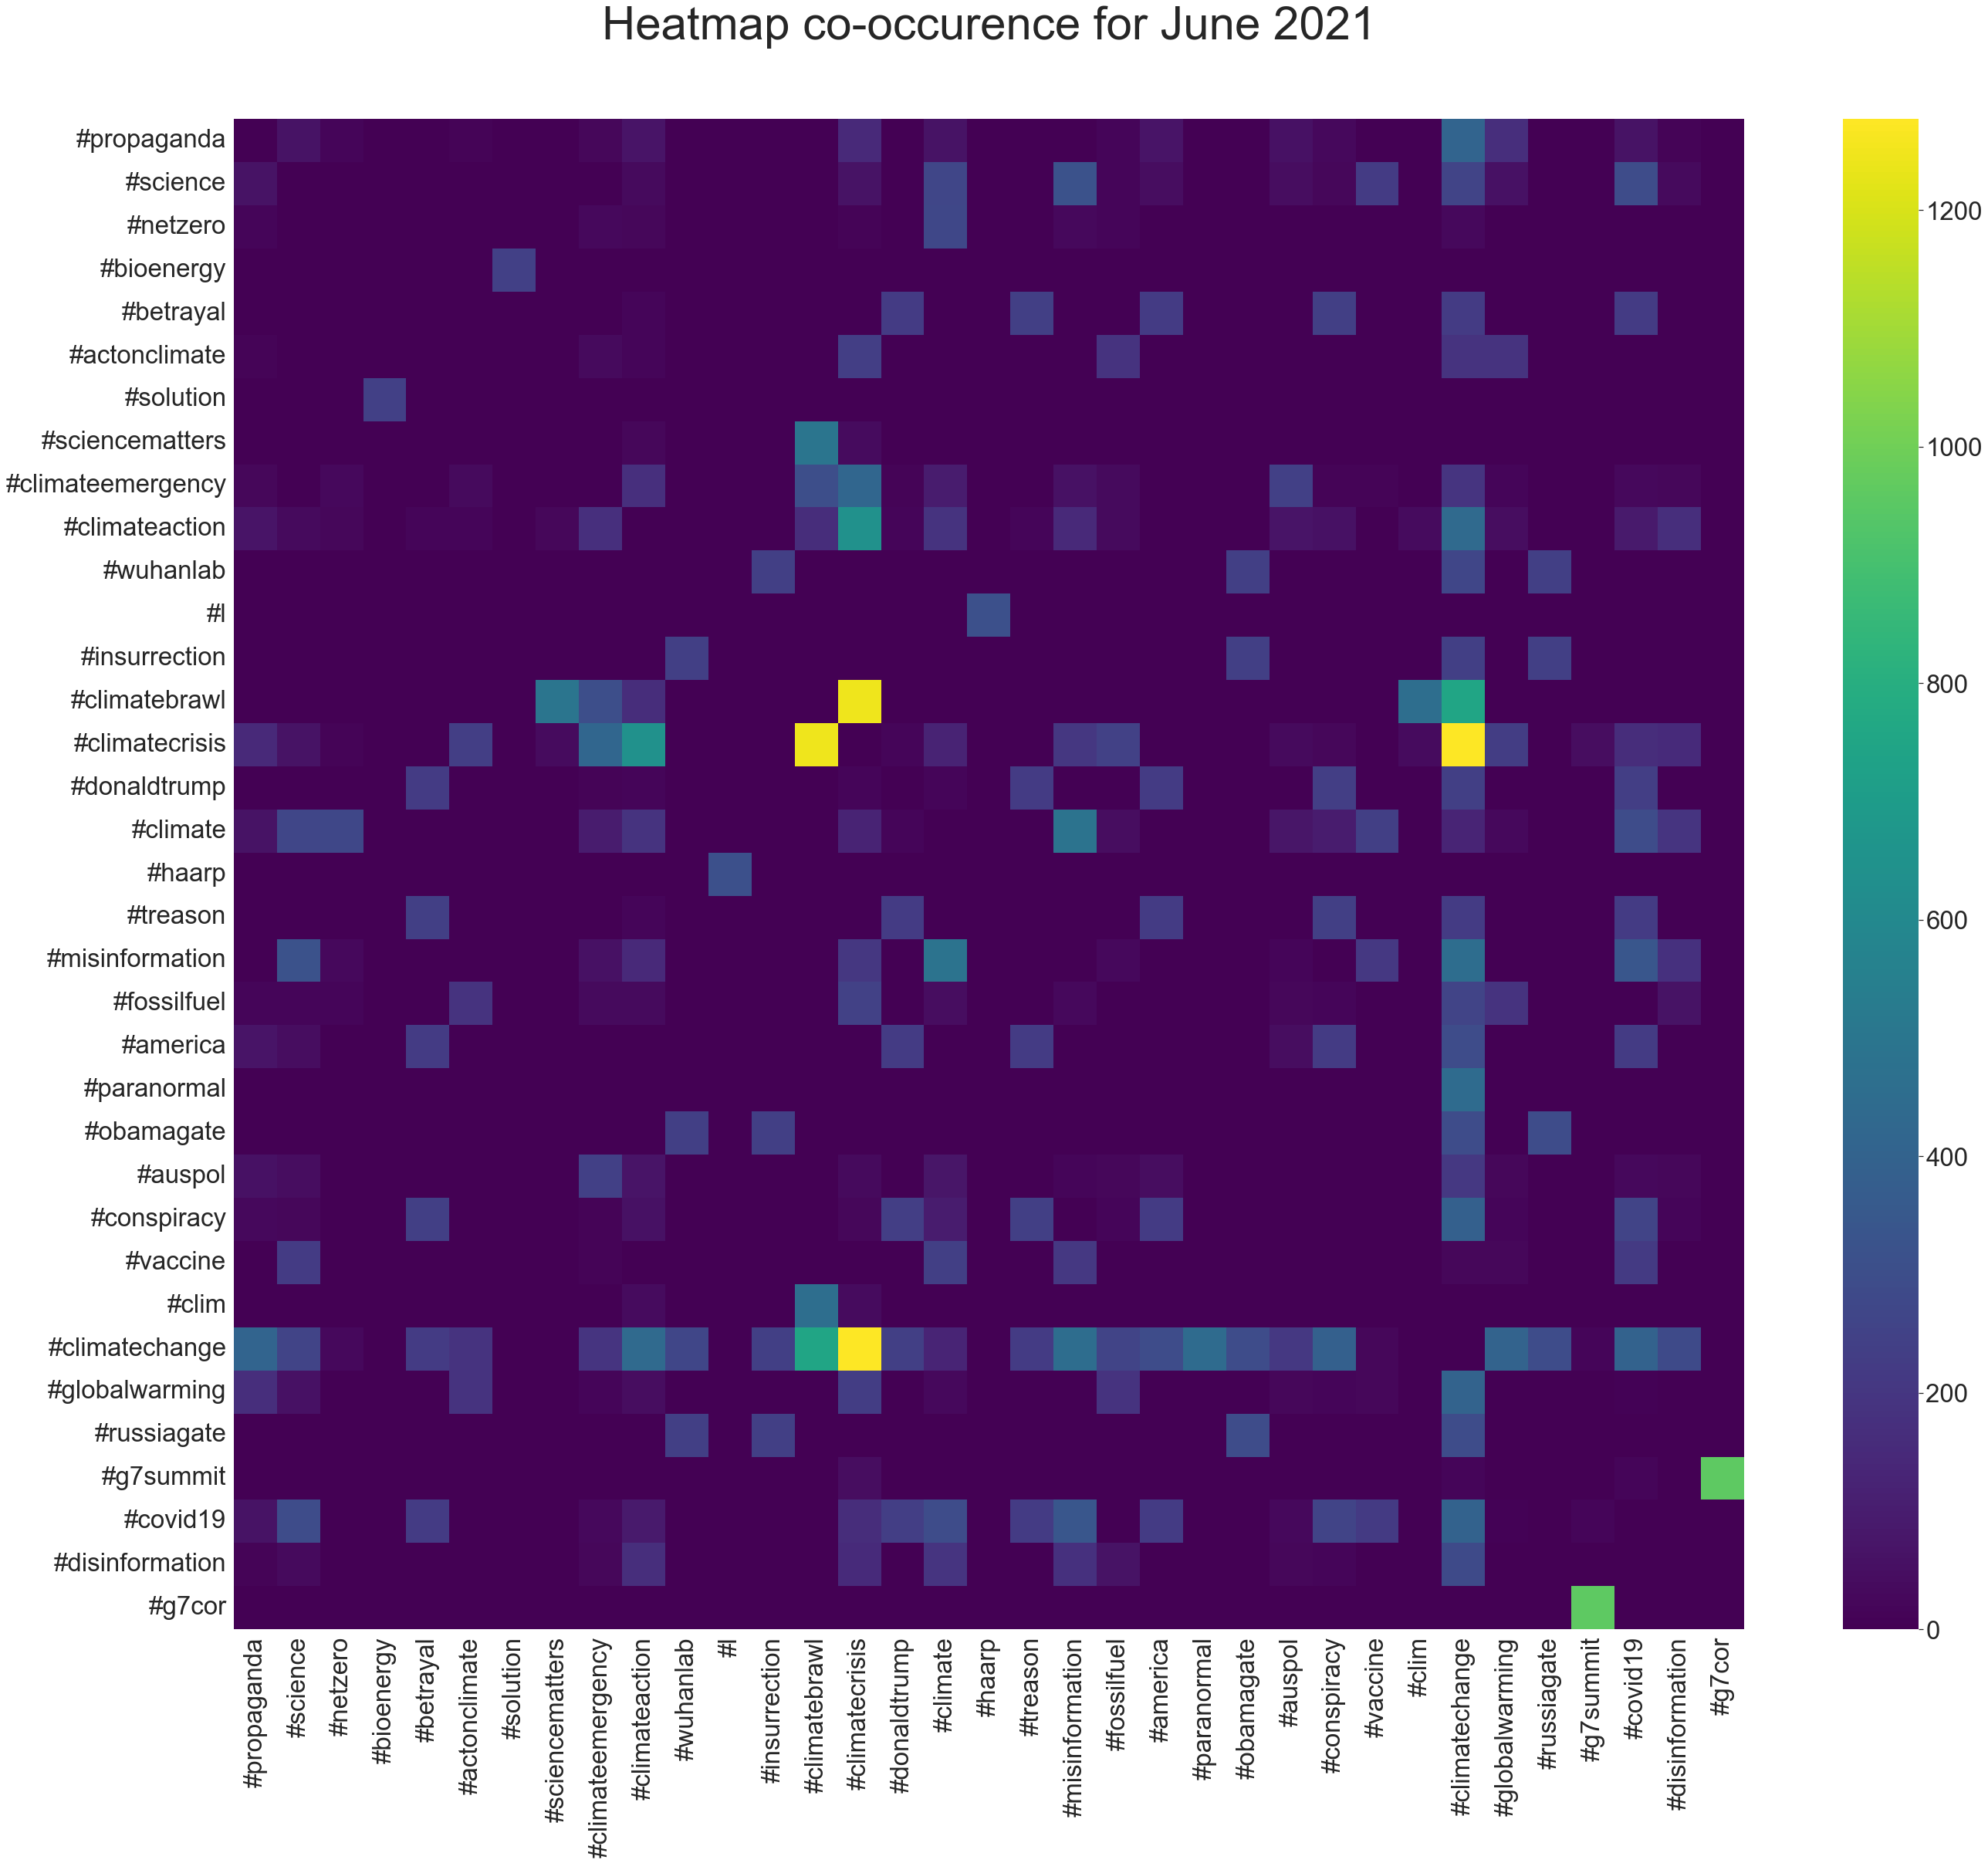

In [11]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis')
plt.title("Heatmap co-occurence for June 2021", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_June21.png")

In [4]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#climatechange', '#climatecrisis'), 1277),
 (('#climatebrawl', '#climatecrisis'), 1243),
 (('#g7cor', '#g7summit'), 961),
 (('#climatebrawl', '#climatechange'), 753),
 (('#climateaction', '#climatecrisis'), 639),
 (('#climatebrawl', '#sciencematters'), 495),
 (('#climate', '#misinformation'), 487),
 (('#clim', '#climatebrawl'), 456),
 (('#climatechange', '#misinformation'), 452),
 (('#climatechange', '#paranormal'), 441),
 (('#climateaction', '#climatechange'), 435),
 (('#climatecrisis', '#climateemergency'), 415),
 (('#climatechange', '#propaganda'), 408),
 (('#climatechange', '#globalwarming'), 400),
 (('#climatechange', '#covid19'), 395),
 (('#climatechange', '#conspiracy'), 385),
 (('#covid19', '#misinformation'), 344),
 (('#misinformation', '#science'), 320),
 (('#haarp', '#l'), 312),
 (('#climatebrawl', '#climateemergency'), 300),
 (('#climatechange', '#obamagate'), 293),
 (('#climatechange', '#russiagate'), 293),
 (('#obamagate', '#russiagate'), 293),
 (('#climate', '#covid1

In [ ]:
# heatmap_df = pd.DataFrame(data=htag_keys, columns=htag_co, index=htag_co)
# sns.heatmap(heatmap_df, square=False, cmap='viridis')

# Most common hashtags

In [28]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)

# uni_htags = list(set(hashtags_refined))
# uni_htags

count_htags.most_common(10)

[('#climatechange', 9887),
 ('#climatecrisis', 4288),
 ('#climate', 3479),
 ('#climatebrawl', 3364),
 ('#climateaction', 2468),
 ('#climateemergency', 1673),
 ('#propaganda', 1588),
 ('#misinformation', 1352),
 ('#disinformation', 1198),
 ('#auspol', 1121)]

# Concordance

In [ ]:
print(climate_strings[0:10000])

In [ ]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("climate", width=150, lines=50)

# Random tweets


In [ ]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

In [ ]:
for index, row in df.iterrows():
    if "#massachusetts" in row.tweet_text.lower() and "#misinformation" in row.tweet_text.lower():
        pprint(row.tweet_text)

# TF-IDF

In [3]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [4]:
len(no_retweets)

51426

In [7]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [8]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(),index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [9]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.7].sort_values(ascending=False)

In [10]:
tokens_above_threshold

blah                0.977474
climatecult         0.963469
qkzr98gx1j          0.938054
misinformation      0.927580
gwhsuj1ysx          0.925608
cult                0.910150
nut                 0.908037
subject             0.904019
ha                  0.899662
lpnejimuts          0.881605
hoax                0.870551
drill               0.866933
anti                0.865440
factcheck           0.864172
love                0.864113
micro               0.849886
silence             0.845268
gop                 0.843308
question            0.837773
climaterealists     0.833036
utc                 0.832908
8vm3umd8yk          0.831224
edqw6impzo          0.830607
climatelockdown     0.826717
baseless            0.821707
2hkzvkorsb          0.808059
amiright            0.803754
spread              0.803731
forever             0.798172
l5dvx2yyxz          0.792937
anthropogenic       0.792445
x8iz3csnyn          0.790099
ta                  0.789789
loki                0.789583
incoming      